#### Beschreibung:
Wendet die implementierte Funktionen aus dem Notebook data_compare/normalized_cross_correlation auf echten Daten an.

In [1]:
%run ../Setup.ipynb
%matplotlib inline

from data_compare import normalized_cross_correlation as compare_normalized_cross_correlation
from data_force_sensor import clean_data as data_force_nut
from data_machine import clean_data as data_virtual_force
import matplotlib.pyplot as plt

In [2]:
comparer = compare_normalized_cross_correlation.NormalizedCrossCorrelationComparer()
comparer.debug = True

# Dataframes einlesen
dataframe_1 = data_force_nut.df.copy()
dataframe_2 = data_virtual_force.df.copy()

ncorr: [3.31357102e-05 6.70633632e-05 1.01710858e-04 ... 1.06036628e-04
 7.09592648e-05 3.55695725e-05]
argmax: 5511
Translation: 1992
##########
time        0 days 00:00:03.984000
_id       5be852b7ac371a581cc68350
field4                            
fx                         -1301.7
fy                         1312.32
fz                        -664.978
fsum                       1848.41
Name: 1992, dtype: object


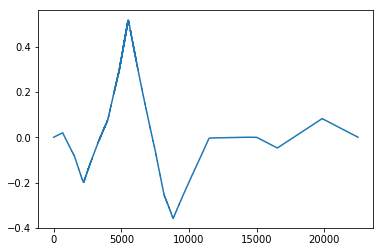

In [3]:
translation = comparer.getBestTranslation(dataframe_1['fsum'], dataframe_2['Virtuelle Kraft'])
translation = len(dataframe_2) - translation

print("Translation: " + str(translation))
print("##########")
print(dataframe_1.iloc[translation])

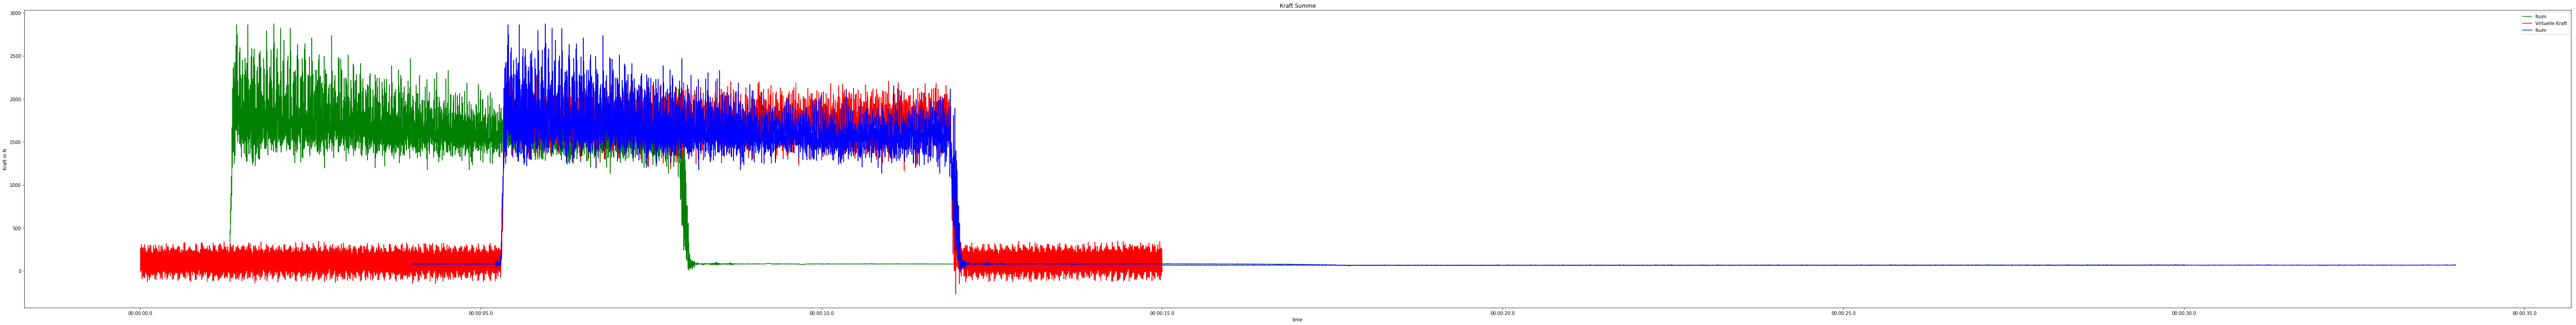

In [4]:
fig, axes = plt.subplots(figsize=(100,12))

df_red = dataframe_2.copy()
df_blue = dataframe_1.copy()
df_green = dataframe_1.copy()

df_blue["time"] = df_blue["time"] + dataframe_1.iloc[translation]["time"]

df_green.plot(color='green', ax=axes, x='time',  y='fsum');
df_red.plot(color='red', ax=axes, x='time',  y='Virtuelle Kraft'); 
df_blue.plot(color='blue', ax=axes, x='time',  y='fsum');

axes.set_title('Kraft Summe');
axes.set_ylabel("Kraft in N");